In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('train_E6oV3lV.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [18]:
df1 = df.query('label==1').sample(frac=1.0)

In [19]:
df1.shape

(2242, 3)

In [20]:
n_df = pd.concat([df,df1],ignore_index=True)
n_df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,4484,4484


In [22]:
count_class_0, count_class_1 = df['label'].value_counts()

In [32]:
df_class_0 =  df.query('label==0')
df_class_1 =  df.query('label==1')

In [52]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1],ignore_index=True ,axis=0)

In [53]:
df_under.shape

(4484, 3)

In [54]:
df_under.groupby('label').count()

,id,tweet
label,,
0,2242,2242
1,2242,2242


In [55]:
df = df_under

In [57]:
X = df['tweet']
Y = df['label']
Y_org = Y

In [58]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [59]:
max(df['tweet'], key=len)

'rotterdam â\x80¢ socafrenzy â\x80¢  ð\x9f\x92\x83ð\x9f\x8f¿ð\x9f\x92\x83ð\x9f\x8f¿ð\x9f\x92\x83ð\x9f\x8f¿ â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢â\x80¢ #dj #djlife  â\x80¦ '

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
pca.fit(X)
X = pca.transform(X);

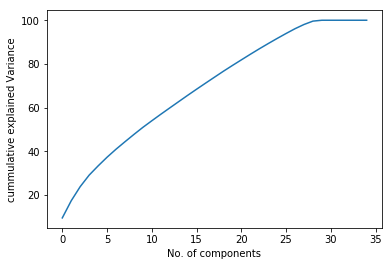

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [65]:
classifier = Sequential()
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu' ,input_dim =X.shape[1]))

In [66]:
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(2,kernel_initializer='uniform', activation='sigmoid'))

In [67]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [68]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [69]:
Y_train

<3587x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3587 stored elements in Compressed Sparse Row format>

In [70]:
Y_test

<897x2 sparse matrix of type '<class 'numpy.float64'>'
	with 897 stored elements in Compressed Sparse Row format>

In [ ]:
checker = classifier.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data = (X_test, Y_test))